In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ["s_length", "s_width", "p_length", "p_width", "class"]
)
print(df.shape)
df.head()

(150, 5)


,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
np.unique(df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
target = df[['class']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,1,2])

In [5]:
df.head()

,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_norm = df[['s_length', 's_width', 'p_length', 'p_width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.head()

,s_length,s_width,p_length,p_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [8]:
df_norm.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [9]:
df = pd.concat([df_norm, target], axis=1)
df.head()

,s_length,s_width,p_length,p_width,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [11]:
def mlp_fit(hls):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=hls, random_state=1)
    clf.fit(X_train, y_train)
    return clf.predict(X_test)

In [12]:
result = []
layers_n = [1, 3, 5, 10]
for n in layers_n:
    prediction = mlp_fit(n)
    result.append(metrics.accuracy_score(prediction, y_test))

#### Análise preliminar dos resultados
- Pelos resultados, a MLP com 3 camadas escondidas teve o melhor desempenho;
- Acima de 3 camadas escondidas, a acurácia permacene a mesma, o que pode indicar perda de perfomance ou até underfitting

In [13]:
pd.DataFrame(np.array([result]), columns=layers_n)

,1,3,5,10
0,0.333333,0.977778,0.977778,0.977778


#### Resultados para o KNN

In [298]:
pd.DataFrame([[0.972222, 0.972222, 0.944444, 0.944444, 0.944444]], columns=['k=1', 'k=3', 'k=5', 'k=7', 'k=9'])

,k=1,k=3,k=5,k=7,k=9
0,0.972222,0.972222,0.944444,0.944444,0.944444


In [283]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    print("Train Sizes: ", train_sizes)
    print("Mean: ", train_scores_mean)
    print("Std: ", train_scores_std)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.legend(loc="best")
    return plt

Train Sizes:  [ 10  34  57  81 105]
Mean:  [0.98       0.99411765 1.         0.99012346 0.98857143]
Std:  [0.04       0.01176471 0.         0.01209625 0.01110658]


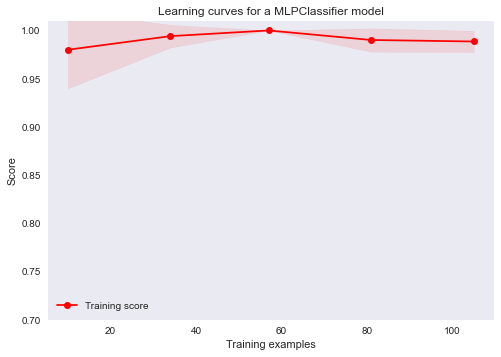

In [284]:
title = 'Learning curves for a MLPClassifier model'
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
estimator = estimator = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=1)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv)

plt.show()